In [59]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import numpy as np

In [60]:
train_df = pd.read_csv(r'data\train.csv')
test_df = pd.read_csv(r'data\test.csv')
gender_sub = pd.read_csv(r'data\gender_submission.csv')

In [75]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
train = train_df[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch']].dropna()
train = pd.get_dummies(train, columns=['Sex'])
test = test_df[['PassengerId','Pclass','Sex','Age','SibSp','Parch']].dropna()
test = pd.get_dummies(test, columns=['Sex'])

In [77]:
test = test.merge(gender_sub,on='PassengerId',how='left')

In [79]:
x_train = train.drop(['Survived','PassengerId'], axis=1)
y_train = train['Survived']
x_test = test.drop(['Survived','PassengerId'],axis=1)
y_test = test['Survived']

In [80]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [81]:
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print(f'훈련 정확도는 : {train_accuracy}, 테스트 정확도는 {test_accuracy} 입니다.')

훈련 정확도는 : 0.9327731092436975, 테스트 정확도는 0.7590361445783133 입니다.


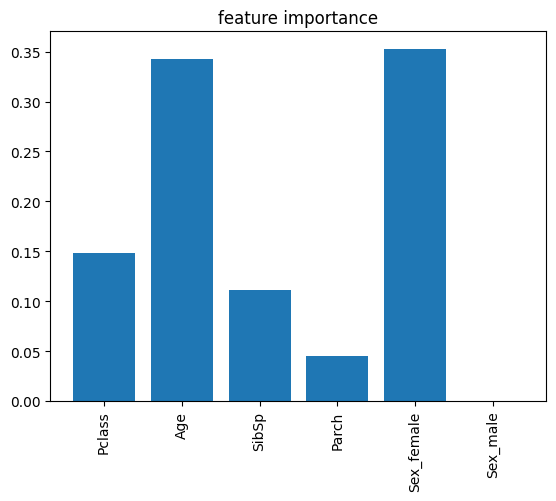

In [82]:
importance = model.feature_importances_
plt.figure()
plt.title('feature importance')
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), x_test.columns, rotation = 90)
plt.show()

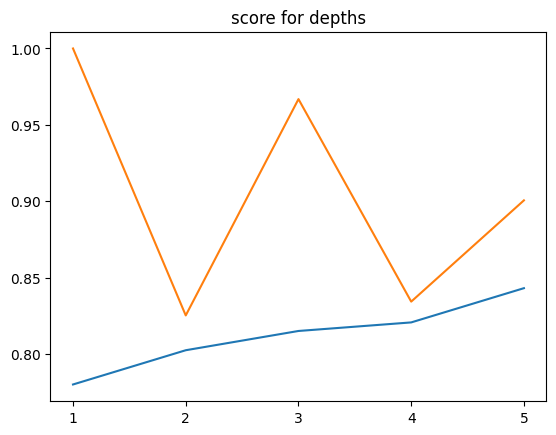

In [87]:
train_score=[]
test_score=[]
for i in range(1,6):
    model=DecisionTreeClassifier(max_depth=i,random_state=4)
    model.fit(x_train,y_train)
    train_score.append(model.score(x_train,y_train))
    test_score.append(model.score(x_test,y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,6),train_score)
plt.plot(range(1,6),test_score)
plt.xticks(range(1,6))
plt.show()

C:\Users\kjk42\AppData\Local\Temp\ipykernel_1012\1733057267.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


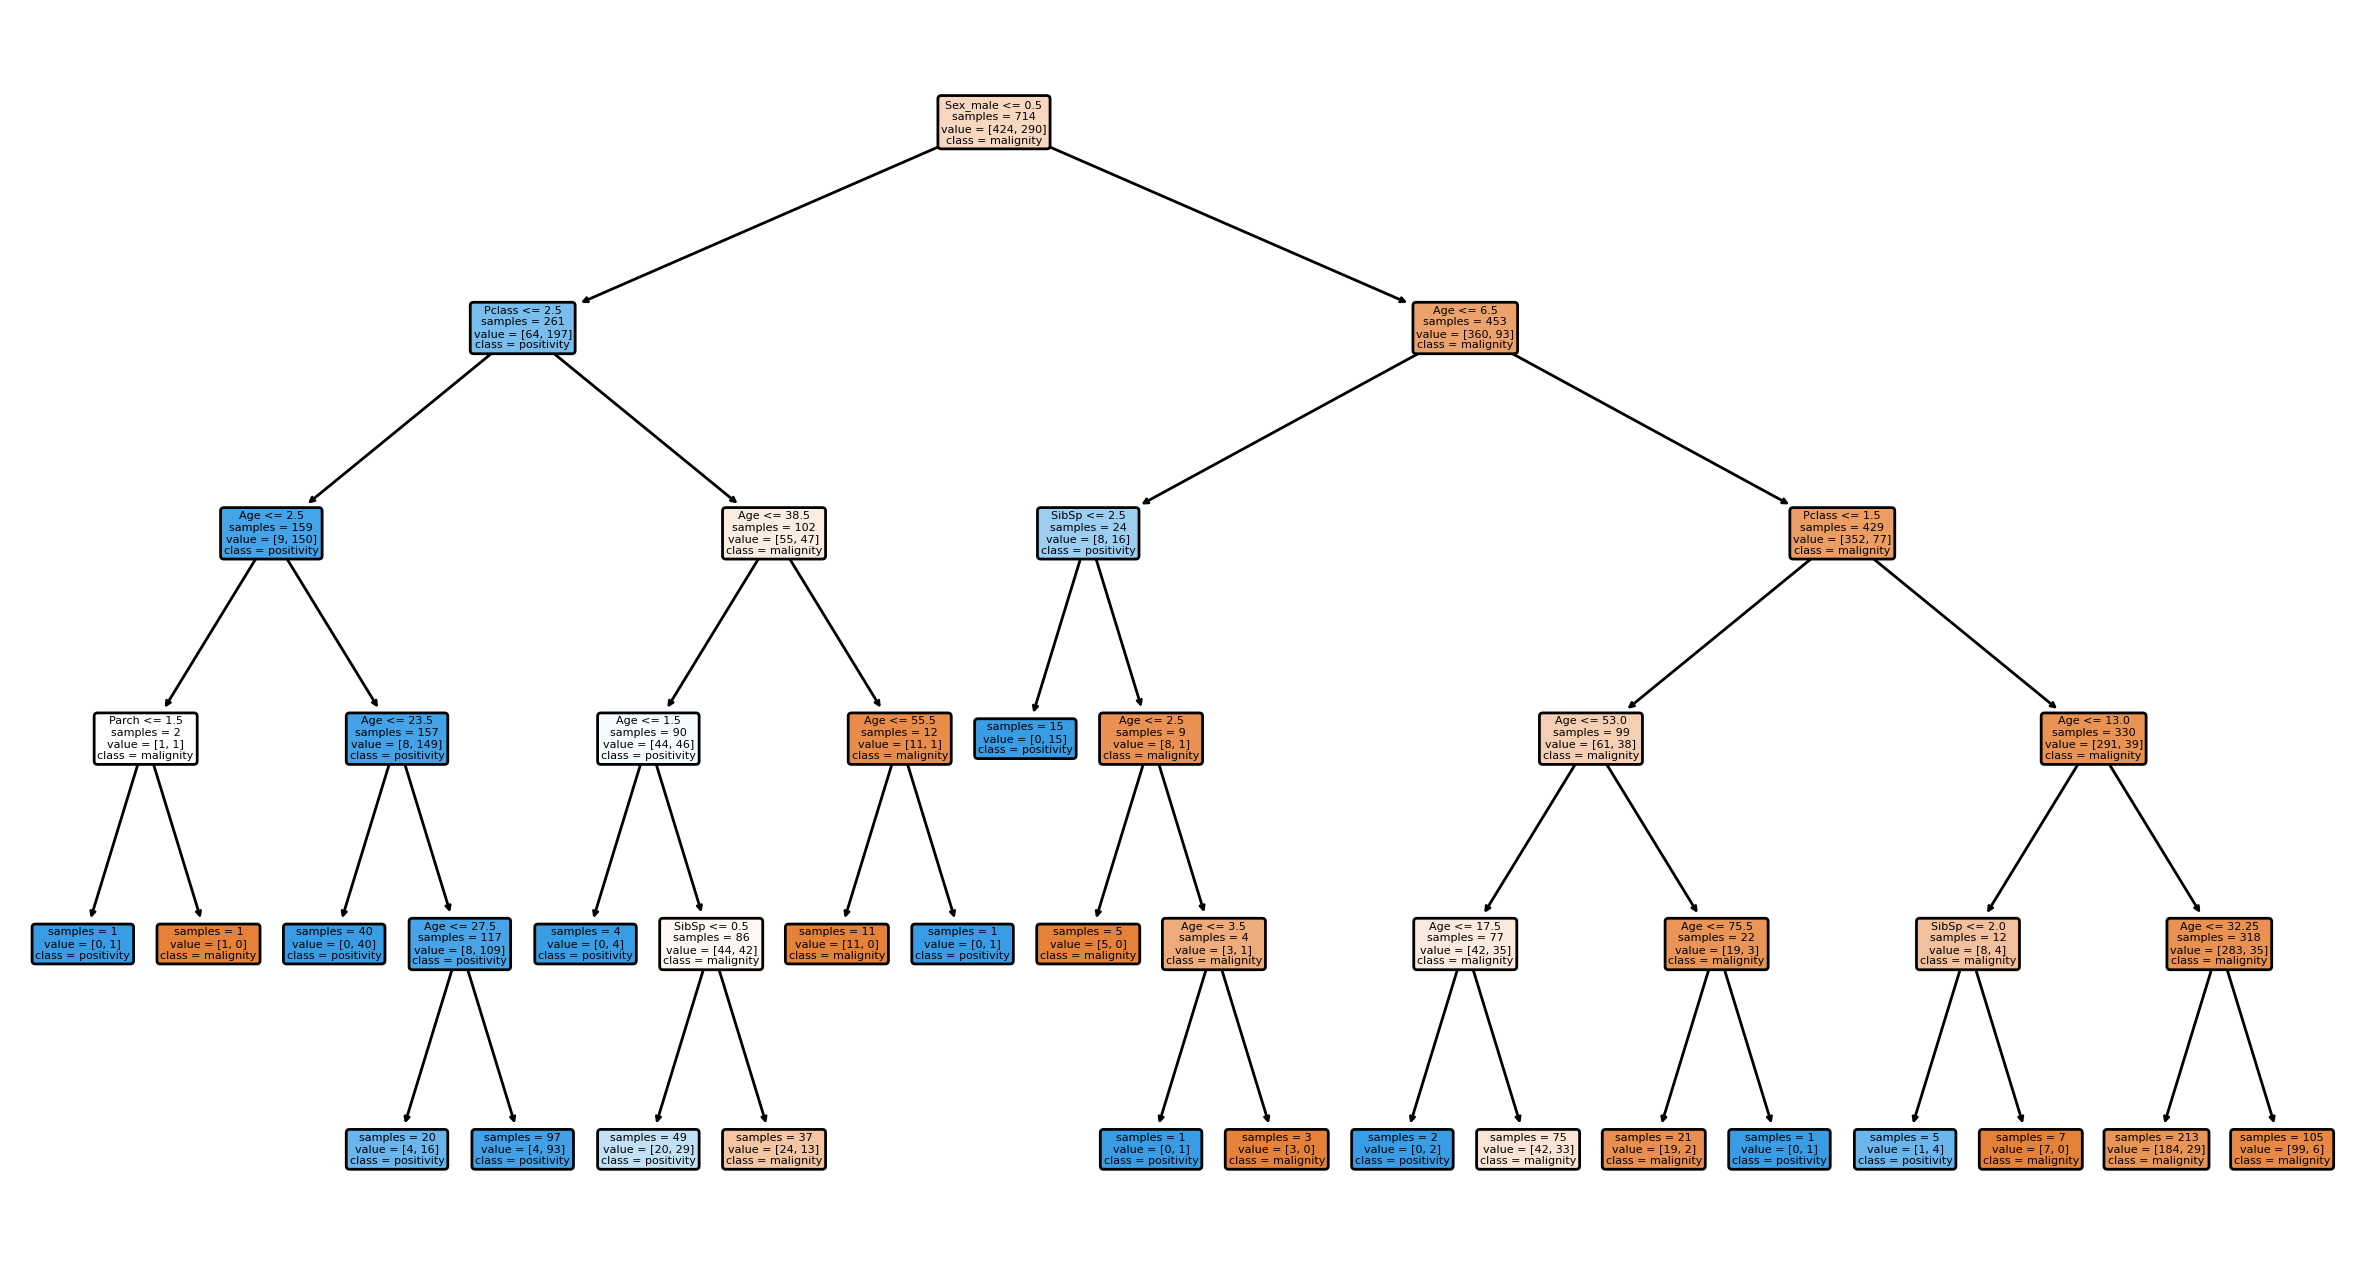

In [90]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.rcParams['figure.figsize'] = [15,8]

plot_tree(model, class_names=["malignity", "positivity"], feature_names=x_train.columns,
         impurity=False, filled=True, rounded=True, fontsize=4)

plt.show()